In [1]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import scipy
import os
import numpy as np
import soundfile as sf
import sounddevice as sd
from scipy import fftpack

In [2]:
data, sr = librosa.load("Data/uni1.wav" ,sr=None)
print(sr)

display.waveplot(data, sr=sr)


C:\Users\ammar\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'Data/uni1.wav'

In [ ]:
data = data/np.max(data)

In [ ]:
sd.play(data, samplerate=sr)

In [74]:
sf.write('Out/FFTHamza3.wav', filtered_sig.real*3, sr, format='wav')

In [71]:
sf.write('Out/FFTButterHamza3.wav', filtered*3, sr, format='wav')

In [72]:
sf.write('Out/PureHamza3.wav', pureHeart*3, sr, format='wav')

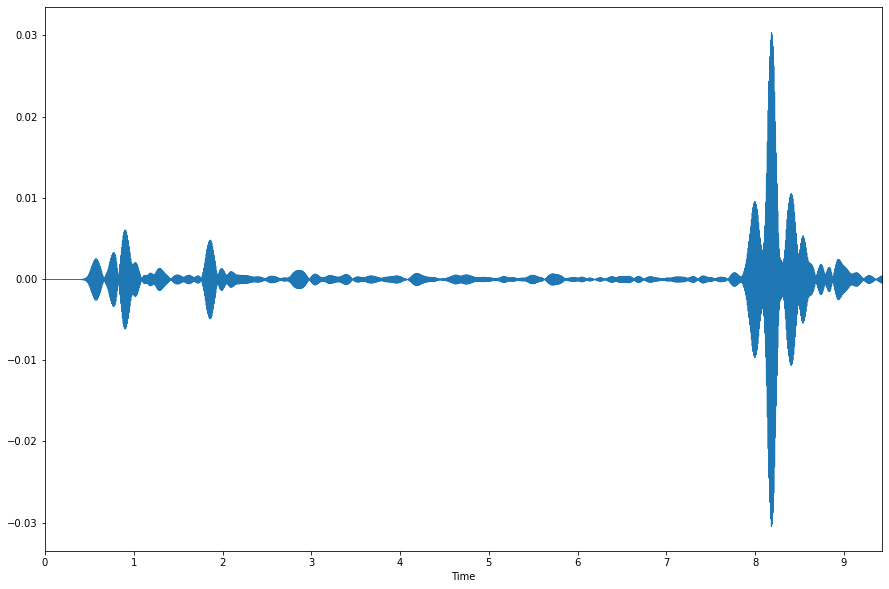

In [592]:
sos = signal.butter(6, (50,60), 'bandpass', fs=sr, output='sos')
t = np.linspace(0, 1/sr, len(y), False)  
filtered = signal.sosfilt(sos, data)
fig, ax = plt.subplots(figsize=(15,10))

#ax.plot(t, filtered)
#plt.show()
display.waveplot(filtered, sr= sr)
sd.play(filtered, samplerate=sr)

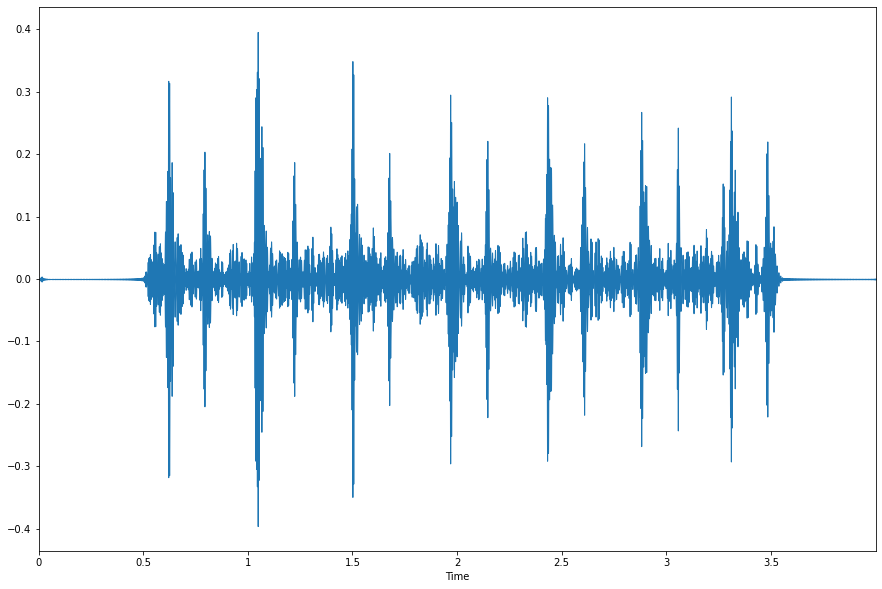

In [59]:
sos = signal.butter(2, 250, 'low', fs=sr, output='sos')
filtered = signal.sosfilt(sos, filtered_sig.astype(float))
sos = signal.butter(2, 50, 'high', fs=sr, output='sos')
filtered = signal.sosfilt(sos, filtered)
sos = signal.butter(6, 150, 'low', fs=sr, output='sos')
filtered = signal.sosfilt(sos, filtered)
sos = signal.butter(6, 60, 'high', fs=sr, output='sos')
filtered = signal.sosfilt(sos, filtered)
fig, ax = plt.subplots(figsize=(15,10))
display.waveplot(filtered*1, sr= sr)
sd.play(filtered*3, samplerate=sr)

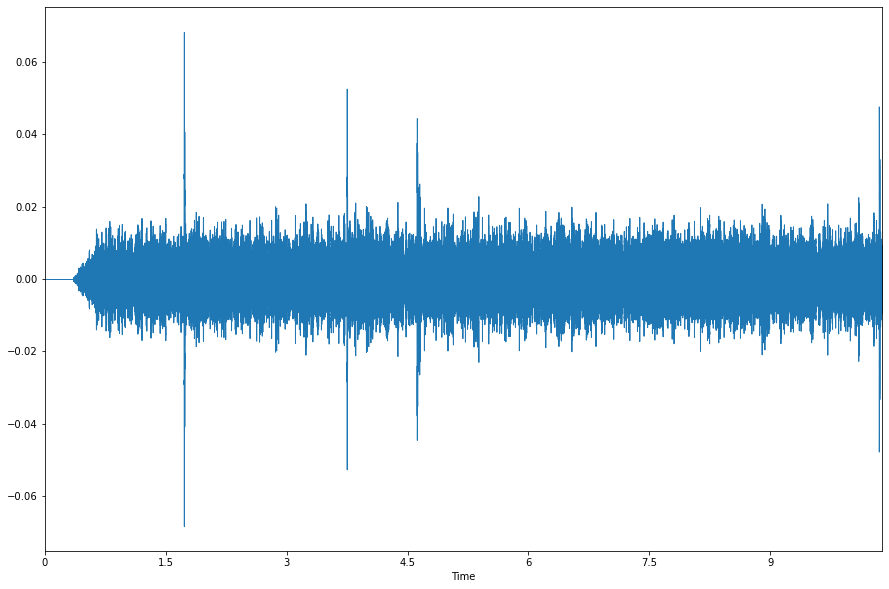

In [552]:
ax, fig = plt.subplots(figsize=(15,10))
display.waveplot(data, sr=sr)
sd.play(data, samplerate=sr)

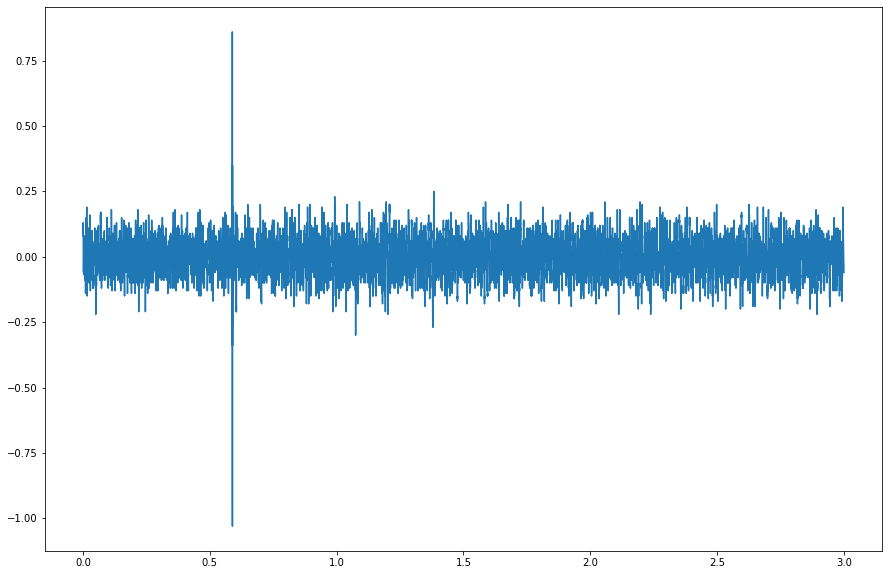

In [7]:
# Seed the random number generator

time_step = 1/sr

sig = data

time_vec = np.arange(0, len(sig)/sr, 1/sr)
#time_vec = time_vec[:-1]
       

plt.figure(figsize=(15, 10))
plt.plot(time_vec, sig, label='Original signal')

Text(0, 0.5, 'power')

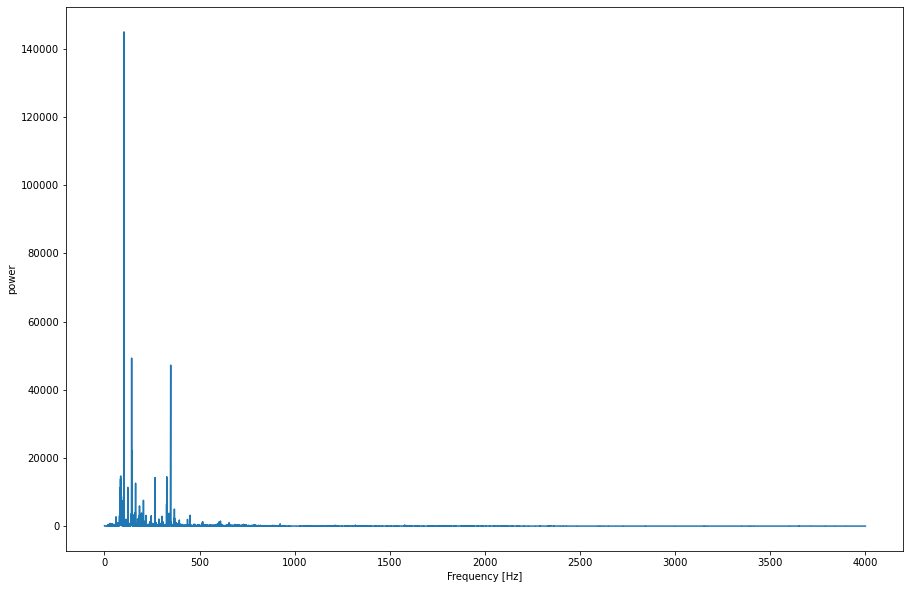

In [36]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(15, 10))
plt.plot(sample_freq[:len(sample_freq)//2], power[:len(sample_freq)//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

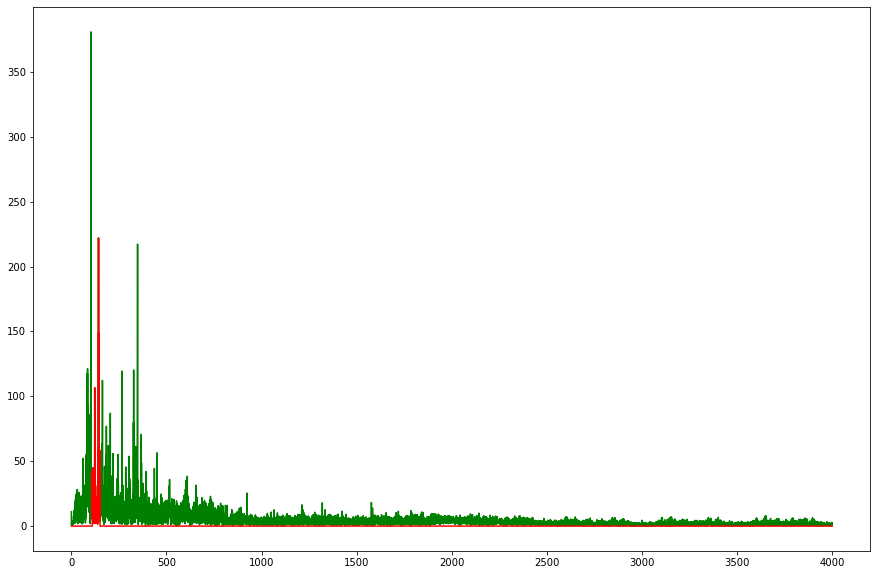

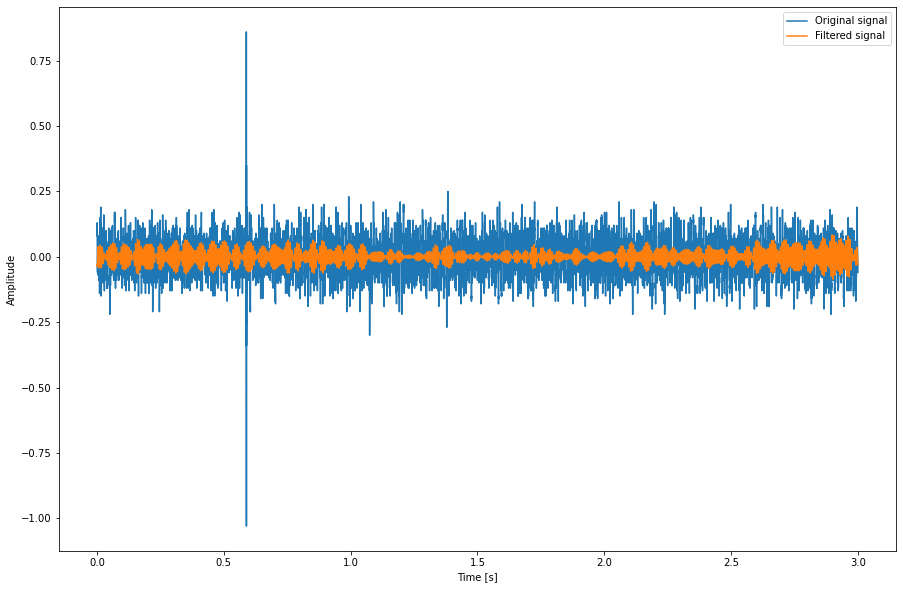

In [37]:
high_freq_fft = sig_fft.copy()
plt.figure(figsize=(15, 10))
plt.plot( sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'green')
high_freq_fft[np.abs(sample_freq) > 150] = 0
#high_freq_fft[np.abs(sample_freq) > 200] = 0
high_freq_fft[np.abs(sample_freq) < 110] = 0

plt.plot(sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'red')
plt.show()

filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(15, 10))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

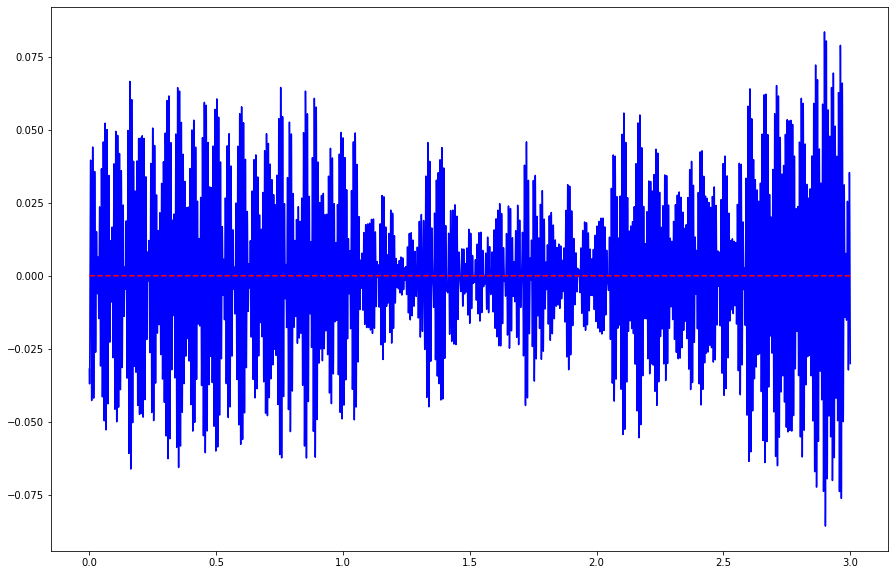

In [38]:
plt.figure(figsize=(15, 10))
plt.plot(time_vec, filtered_sig.real, 'b-', time_vec, filtered_sig.imag, 'r--')

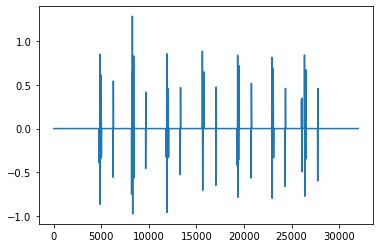

In [69]:
pureHeart = filtered_sig.real.copy()
pureHeart[np.abs(pureHeart) > 0.15 ] *= 2
pureHeart[np.abs(pureHeart) <= 0.15 ] *= 0.01
plt.plot(pureHeart)

In [70]:
sd.play(pureHeart*5, samplerate=sr)

In [39]:
sd.play(filtered_sig.real*1, samplerate=sr)

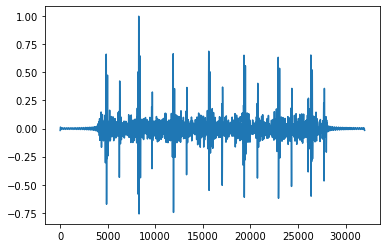

In [33]:
ampFilt = filtered_sig/max(filtered_sig)
plt.plot(ampFilt)

In [34]:
sd.play(ampFilt.real, samplerate=sr)

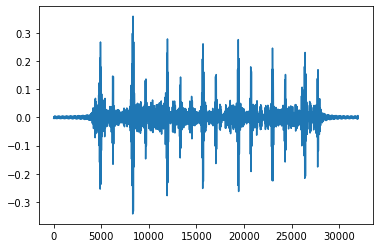

In [21]:
plt.plot(filtered_sig.real)

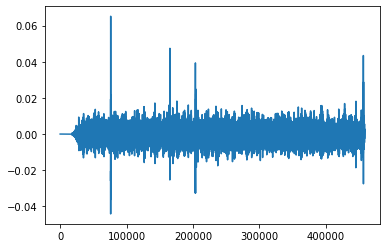

In [70]:
from pywt import wavedec
mixed_signal = data.copy()
coeffs = wavedec(mixed_signal, 'sym16', level=7)
thres_det = []
for detail_coeff in coeffs:
    cdt = pywt.threshold(detail_coeff, 0.8*np.std(detail_coeff)/2, mode='soft')
    thres_det.append(cdt)

rec = pywt.waverec(thres_det, 'sym16')
plt.plot(rec)

In [71]:
sd.play(rec,samplerate=sr)

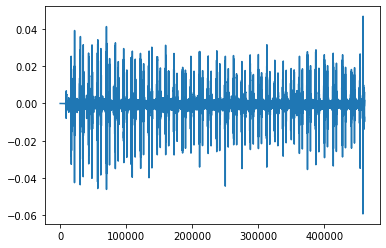

In [12]:
plt.plot(ca-cb)

In [14]:
sd.play(ca+cb, samplerate=sr)

In [35]:
from scipy import signal
import matplotlib.pyplot as plt
#t = np.linspace(-1, 1, 200, endpoint=False)
#sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
sig = data
widths = np.arange(1, 30)
cwtmatr = signal.daub(sig) #signal.cwt(sig, signal.daub)
plt.imshow(cwtmatr, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [84]:
file = open("audio.txt")
audio = []
while(True):
    l = file.readline()
    if(len(l)>0):
        print(int(l))
        audio.append(int(l))
    else:
        break

328
346
328
299
302
326
349
332
304
300
321
348
336
306
301
312
342
342
312
294
306
336
342
320
299
304
333
352
328
304
301
323
352
331
304
304
325
348
336
304
301
320
342
338
306
300
307
343
348
320
299
305
336
348
322
302
304
332
346
330
302
302
325
348
336
305
299
320
352
336
308
300
312
344
344
316
297
328
336
345
322
301
304
332
349
328
301
302
320
352
329
304
296
321
343
336
304
286
310
336
340
320
298
307
336
344
320
304
304
336
348
322
300
304
328
345
322
304
300
320
343
336
304
304
317
334
338
312
302
308
340
346
317
294
304
333
344
324
304
304
329
347
326
304
304
321
342
338
304
294
316
341
336
306
291
320
340
344
320
300
304
336
350
320
296
304
333
352
324
300
304
326
352
329
304
299
316
346
337
304
300
313
342
341
310
297
310
336
345
320
294
304
330
344
322
304
304
328
347
330
304
298
320
345
333
304
294
311
339
340
300
293
306
337
344
320
304
305
336
346
320
301
304
324
350
331
301
293
320
346
336
306
297
316
337
338
304
298
314
342
340
314
298
306
336
346
322
302
304
325


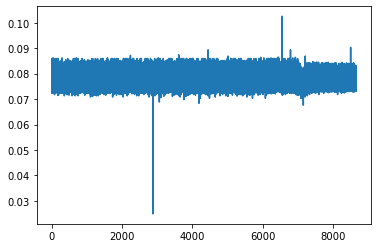

In [85]:
plt.plot(np.array(audio)/4096)

In [86]:
max(audio)

420

In [128]:
sd.play(np.array(audio)/4096, 1000)

In [94]:
data = np.array(audio)/4096
sr = 4000